In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from tensorflow.keras.optimizers import SGD
from matplotlib.image import imread
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers.convolutional import Conv2D,MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Flatten, Activation, Dropout
from collections import Counter
from shutil import copy

# Verzeichnisse für Train und Test Datensatz

In [4]:
train_dataset_path = 'Data/train'
test_dataset_path = 'Data/test'

In [5]:
train_dataset=ImageDataGenerator(rescale=1.0/255.0)
test_dataset=ImageDataGenerator(rescale=1.0/255.0)

In [6]:
train_set=train_dataset.flow_from_directory(train_dataset_path, target_size=(64,64),
                                           batch_size=10, class_mode='categorical')
test_set=test_dataset.flow_from_directory(test_dataset_path, target_size=(64,64),
                                           batch_size=2, class_mode='categorical', shuffle = False)

batch_x, batch_y = train_set.next()
batch_x, batch_y = test_set.next()
print('Batch shape = %s, min = %.3f, max=%.3f' % (batch_x.shape, batch_x.min(), batch_x.max()))

Found 233 images belonging to 3 classes.
Found 60 images belonging to 3 classes.
Batch shape = (2, 64, 64, 3), min = 0.000, max=1.000


In [7]:
steps_per_epoch = len(train_set) 
validation_steps =len(test_set)
print('Training samples :', steps_per_epoch)
print('Test samples :', validation_steps)

Training samples : 24
Test samples : 30


[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]


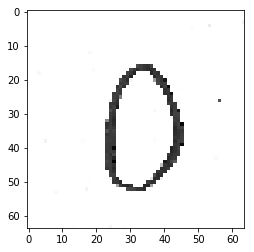

[[1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]


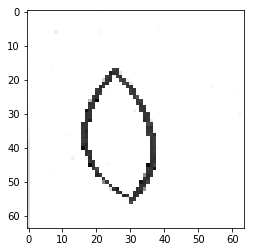

[[0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]


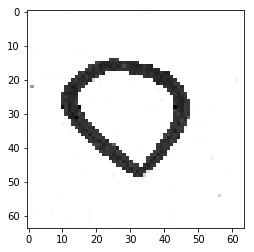

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


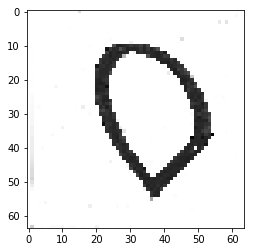

[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]


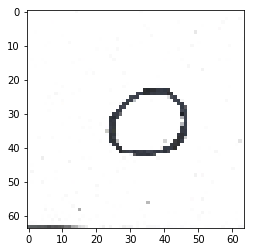

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]]


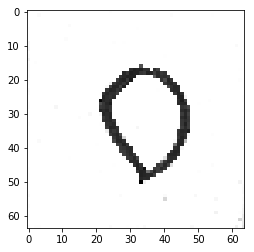

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]


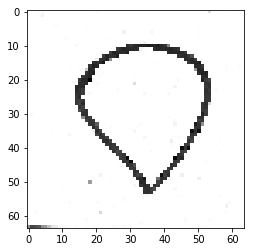

[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


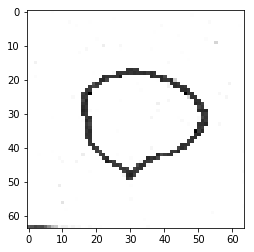

[[0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]


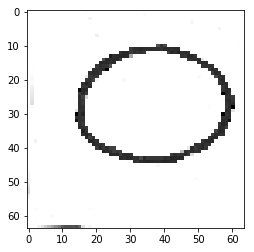

[[1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


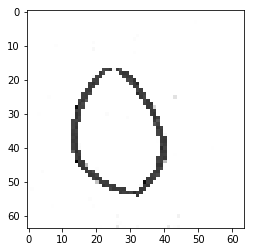

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


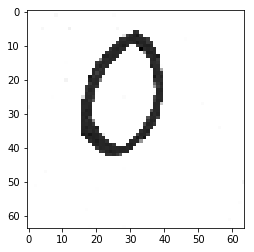

[[1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]


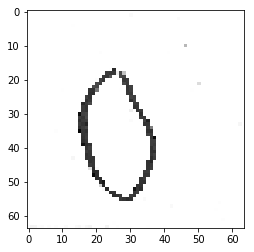

[[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


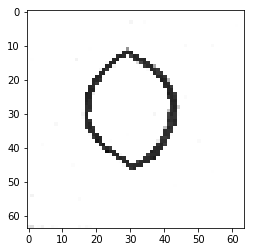

[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]]


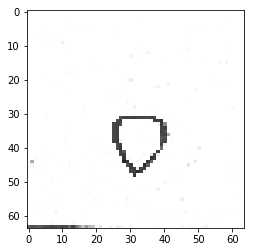

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]]


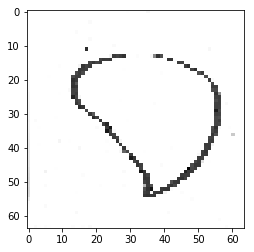

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


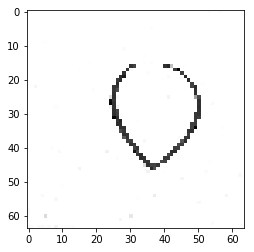

[[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]


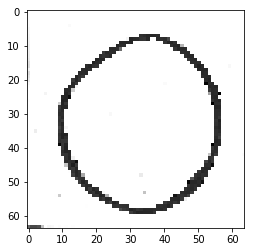

[[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]


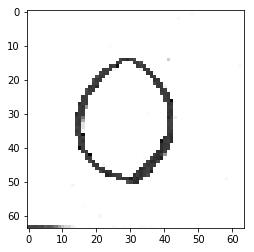

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


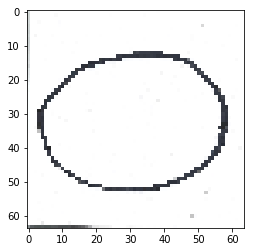

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]]


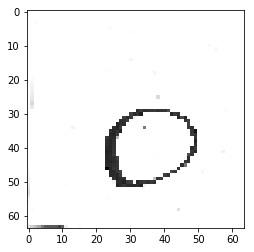

[[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]


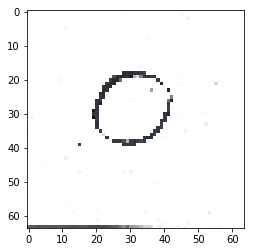

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


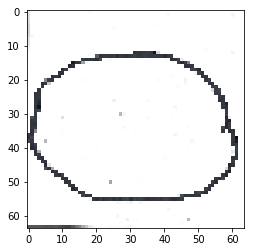

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


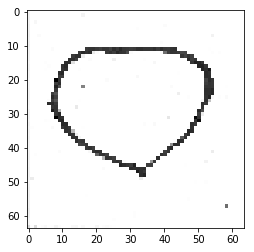

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


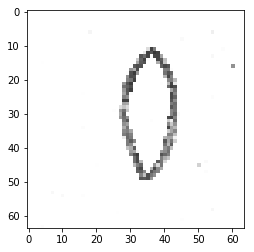

[[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


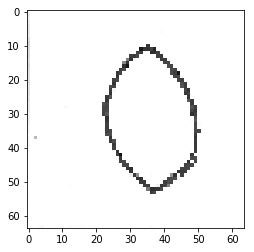

[[0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


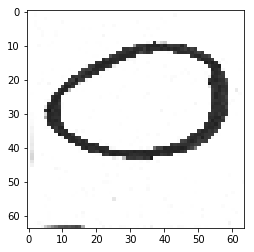

[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


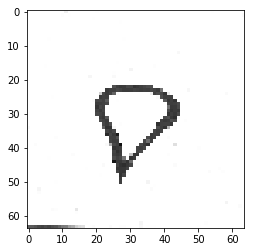

[[1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]


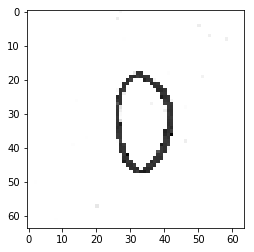

[[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


KeyboardInterrupt: 

In [39]:
for i in range (0,233):
    train_batch_x, batch_y = train_set.next()
    image = train_batch_x[0]
    print(batch_y)
    plt.imshow(image)
    plt.show()
train_set.reset()
test_set.reset()

In [ ]:
for i in range (0,60):
    test_batch_x, batch_y = test_set.next()
    image = test_batch_x[0]
    print(batch_y)
    plt.imshow(image)
    plt.show()


# Topologie des neuronalen Netzes
https://keras.io/layers/convolutional/

https://keras.io/layers/pooling/

https://keras.io/initializers/

In [8]:
cnn_model = Sequential()

#INPUT
cnn_model.add(Conv2D(
    32, (4, 4), input_shape=(64, 64, 3), activation='relu',kernel_initializer='uniform', padding='same'))

cnn_model.add(MaxPooling2D(pool_size=(4, 4)))


#Hidden Layer 1
cnn_model.add(Conv2D(
    32, (8, 8),  activation='relu',kernel_initializer='uniform', padding='same'))

cnn_model.add(MaxPooling2D(pool_size=(4, 4)))



#Flatt Layer
cnn_model.add(Flatten())

cnn_model.add(Dense(48, activation='relu', kernel_initializer='uniform'))

cnn_model.add(Dense(3, activation='softmax', kernel_initializer='uniform'))

2021-10-14 07:40:08.998712: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


TypeError: Parameter to MergeFrom() must be instance of same class: expected tensorflow.TensorShapeProto got tensorflow.TensorShapeProto.

In [56]:
cnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 64, 64, 32)        1568      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 16, 16, 32)        65568     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 48)                24624     
_________________________________________________________________
dense_16 (Dense)             (None, 3)                 147       
Total para

In [57]:
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Anzahl der Gradientenabstiege

In [58]:
epochs = 15

# Training

In [59]:
train_set.reset()
test_set.reset()
history = cnn_model.fit_generator(train_set, steps_per_epoch=steps_per_epoch, validation_data=test_set,
                                      validation_steps=validation_steps, epochs=epochs)

Epoch 1/15
24/24 [==============================] - 11s 448ms/step - loss: 1.1054 - acc: 0.3347 - val_loss: 1.0985 - val_acc: 0.3333

# Genauigkeit auf Train und Test Datensatz

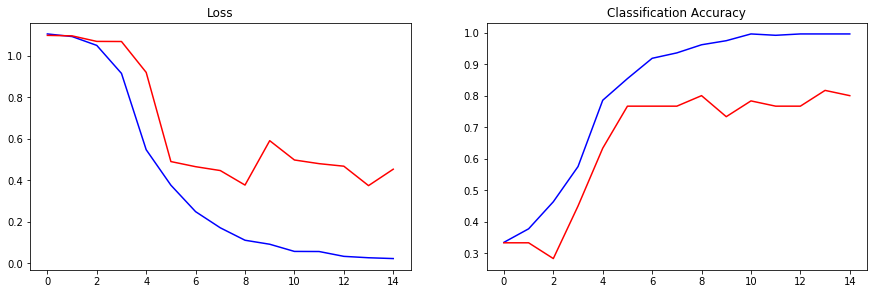

In [60]:
# plot loss
plt.figure(figsize=(15,10))
plt.subplot(221)
plt.title('Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='red', label='test')

# plot accuracy
plt.subplot(222)
plt.title('Classification Accuracy')
plt.plot(history.history['acc'], color='blue', label='train')
plt.plot(history.history['val_acc'], color='red', label='test')
#plt.grid()
plt.show()

In [61]:
_, acc = cnn_model.evaluate_generator(train_set, steps=len(train_set), verbose=3)
print('Accuracy on Training Data:  %.3f' % (acc * 100.0))
_, acc = cnn_model.evaluate_generator(test_set, steps=len(test_set), verbose=3)
print('Accuracy on Test Data :  %.3f' % (acc * 100.0))

Accuracy on Training Data:  99.571
Accuracy on Test Data :  80.000


In [62]:
pred=cnn_model.predict_generator(test_set, 60, verbose=1)
predicted_class_indices=np.argmax(pred,axis=1)
labels = (test_set.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]
filenames=test_set.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
results.to_csv("results.csv",index=False)


60/60 [==============================] - 3s 56ms/step

ValueError: arrays must all be same length

Label: [[1. 0. 0.]
 [1. 0. 0.]] S2_Ellipse | Vorhersage: [0.55 0.00 0.44] S2_Ellipse


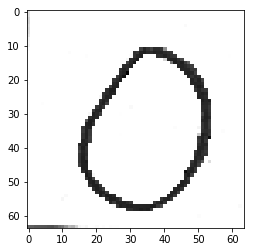

Label: [[1. 0. 0.]
 [1. 0. 0.]] S2_Ellipse | Vorhersage: [0.63 0.00 0.36] S2_Ellipse


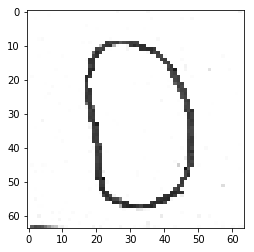

Label: [[1. 0. 0.]
 [1. 0. 0.]] S2_Ellipse | Vorhersage: [1.00 0.00 0.00] S2_Ellipse


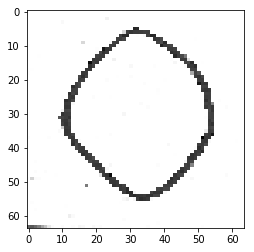

Label: [[1. 0. 0.]
 [1. 0. 0.]] S2_Ellipse | Vorhersage: [1.00 0.00 0.00] S2_Ellipse


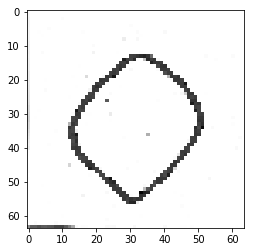

Label: [[1. 0. 0.]
 [1. 0. 0.]] S2_Ellipse | Vorhersage: [1.00 0.00 0.00] S2_Ellipse


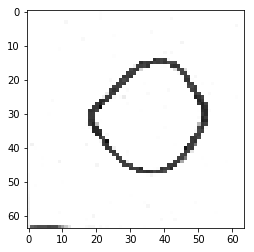

Label: [[1. 0. 0.]
 [1. 0. 0.]] S2_Ellipse | Vorhersage: [0.16 0.01 0.83] S2_Tropfen


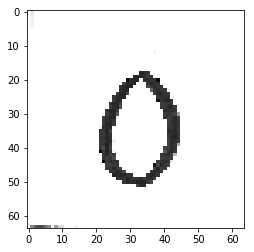

Label: [[1. 0. 0.]
 [1. 0. 0.]] S2_Ellipse | Vorhersage: [0.99 0.00 0.01] S2_Ellipse


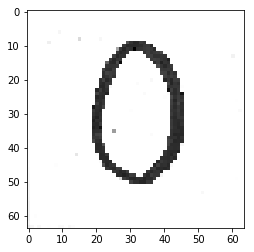

Label: [[0. 1. 0.]
 [0. 1. 0.]] S2_Rund | Vorhersage: [0.49 0.00 0.51] S2_Tropfen


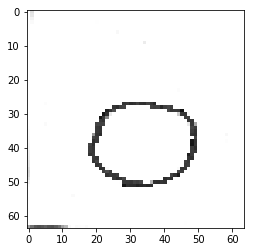

Label: [[0. 1. 0.]
 [0. 1. 0.]] S2_Rund | Vorhersage: [0.36 0.00 0.64] S2_Tropfen


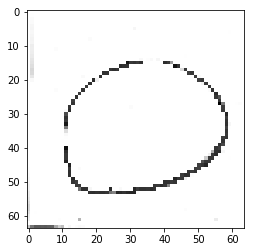

Label: [[0. 1. 0.]
 [0. 1. 0.]] S2_Rund | Vorhersage: [0.04 0.00 0.96] S2_Tropfen


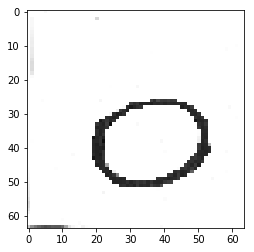

Label: [[0. 1. 0.]
 [0. 1. 0.]] S2_Rund | Vorhersage: [0.01 0.06 0.93] S2_Tropfen


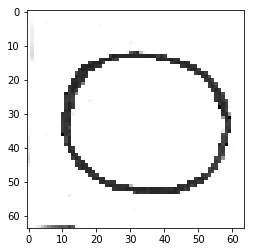

Label: [[0. 1. 0.]
 [0. 1. 0.]] S2_Rund | Vorhersage: [1.00 0.00 0.00] S2_Ellipse


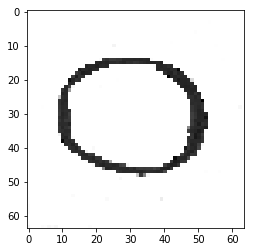

Label: [[0. 1. 0.]
 [0. 1. 0.]] S2_Rund | Vorhersage: [1.00 0.00 0.00] S2_Ellipse


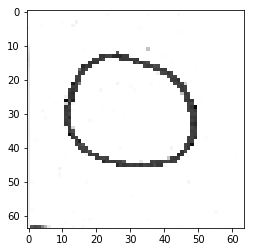

Label: [[0. 1. 0.]
 [0. 1. 0.]] S2_Rund | Vorhersage: [0.15 0.00 0.85] S2_Tropfen


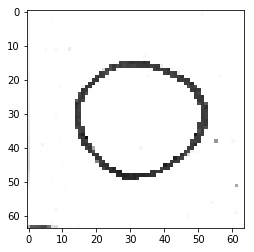

Label: [[0. 1. 0.]
 [0. 1. 0.]] S2_Rund | Vorhersage: [1.00 0.00 0.00] S2_Ellipse


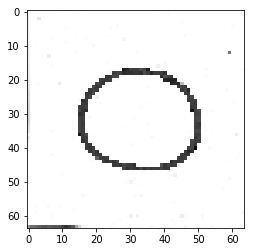

Label: [[0. 1. 0.]
 [0. 1. 0.]] S2_Rund | Vorhersage: [1.00 0.00 0.00] S2_Ellipse


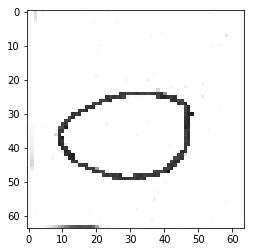

Label: [[0. 1. 0.]
 [0. 1. 0.]] S2_Rund | Vorhersage: [0.03 0.93 0.04] S2_Rund


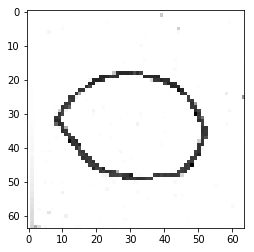

Label: [[0. 0. 1.]
 [0. 0. 1.]] S2_Tropfen | Vorhersage: [0.00 0.92 0.08] S2_Rund


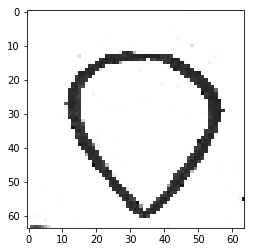

Label: [[0. 0. 1.]
 [0. 0. 1.]] S2_Tropfen | Vorhersage: [0.01 0.77 0.22] S2_Rund


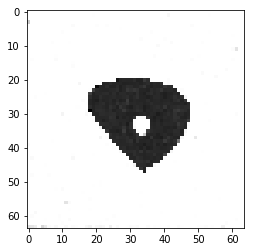

Label: [[0. 0. 1.]
 [0. 0. 1.]] S2_Tropfen | Vorhersage: [0.00 0.66 0.34] S2_Rund


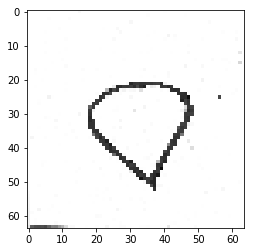

Label: [[0. 0. 1.]
 [0. 0. 1.]] S2_Tropfen | Vorhersage: [0.01 0.93 0.06] S2_Rund


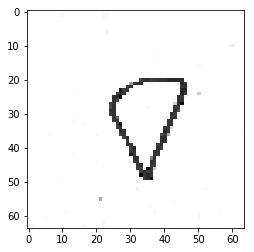

Label: [[0. 0. 1.]
 [0. 0. 1.]] S2_Tropfen | Vorhersage: [0.00 0.98 0.02] S2_Rund


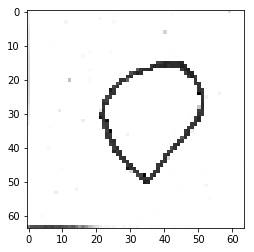

Label: [[0. 0. 1.]
 [0. 0. 1.]] S2_Tropfen | Vorhersage: [0.01 0.47 0.51] S2_Tropfen


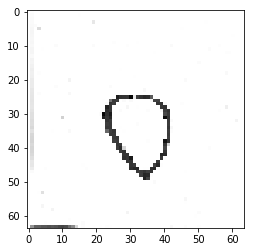

Label: [[0. 0. 1.]
 [0. 0. 1.]] S2_Tropfen | Vorhersage: [0.00 1.00 0.00] S2_Rund


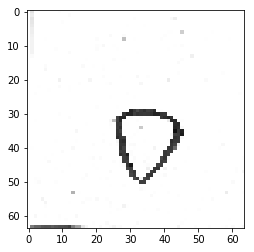

Label: [[0. 0. 1.]
 [0. 0. 1.]] S2_Tropfen | Vorhersage: [0.00 0.94 0.06] S2_Rund


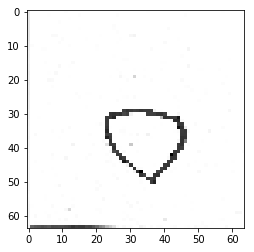

Label: [[0. 0. 1.]
 [0. 0. 1.]] S2_Tropfen | Vorhersage: [0.10 0.46 0.44] S2_Rund


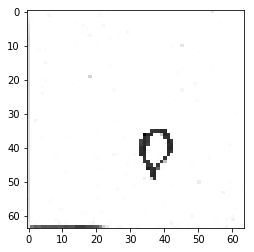

Label: [[0. 0. 1.]
 [0. 0. 1.]] S2_Tropfen | Vorhersage: [0.00 0.89 0.11] S2_Rund


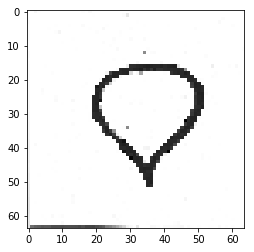

Label: [[1. 0. 0.]
 [1. 0. 0.]] S2_Ellipse | Vorhersage: [0.00 0.96 0.04] S2_Rund


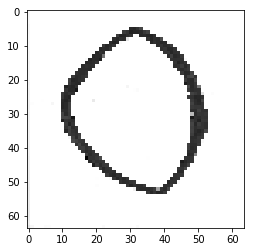

Label: [[1. 0. 0.]
 [1. 0. 0.]] S2_Ellipse | Vorhersage: [0.00 0.18 0.82] S2_Tropfen


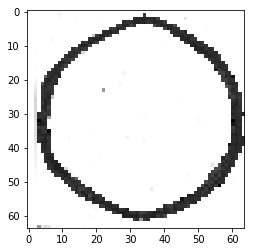

Label: [[1. 0. 0.]
 [1. 0. 0.]] S2_Ellipse | Vorhersage: [0.00 0.17 0.83] S2_Tropfen


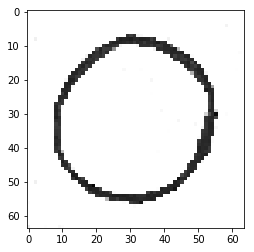

Label: [[1. 0. 0.]
 [1. 0. 0.]] S2_Ellipse | Vorhersage: [0.00 0.99 0.01] S2_Rund


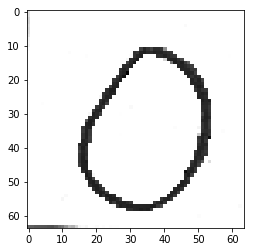

Label: [[1. 0. 0.]
 [1. 0. 0.]] S2_Ellipse | Vorhersage: [0.00 0.98 0.02] S2_Rund


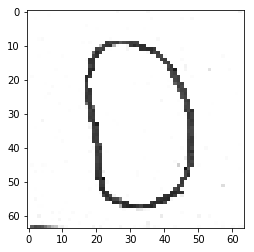

Label: [[1. 0. 0.]
 [1. 0. 0.]] S2_Ellipse | Vorhersage: [0.00 0.99 0.01] S2_Rund


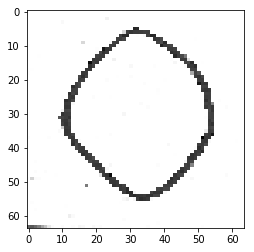

Label: [[1. 0. 0.]
 [1. 0. 0.]] S2_Ellipse | Vorhersage: [0.00 0.99 0.01] S2_Rund


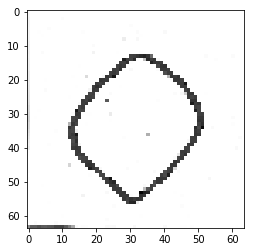

Label: [[1. 0. 0.]
 [1. 0. 0.]] S2_Ellipse | Vorhersage: [0.00 1.00 0.00] S2_Rund


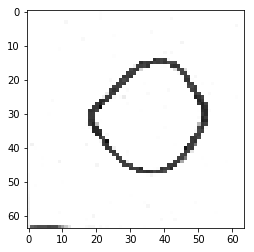

Label: [[1. 0. 0.]
 [1. 0. 0.]] S2_Ellipse | Vorhersage: [0.00 0.99 0.01] S2_Rund


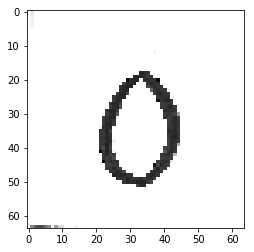

Label: [[1. 0. 0.]
 [1. 0. 0.]] S2_Ellipse | Vorhersage: [0.03 0.00 0.97] S2_Tropfen


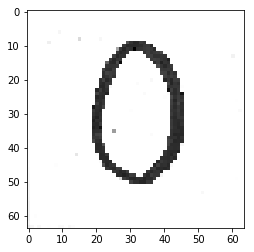

Label: [[0. 1. 0.]
 [0. 1. 0.]] S2_Rund | Vorhersage: [0.00 0.00 1.00] S2_Tropfen


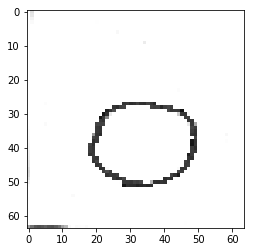

Label: [[0. 1. 0.]
 [0. 1. 0.]] S2_Rund | Vorhersage: [0.00 0.03 0.97] S2_Tropfen


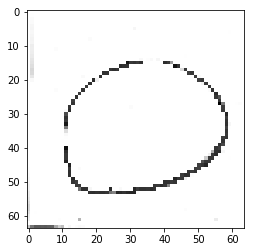

Label: [[0. 1. 0.]
 [0. 1. 0.]] S2_Rund | Vorhersage: [0.53 0.15 0.32] S2_Ellipse


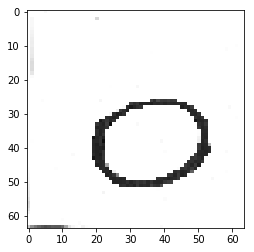

Label: [[0. 1. 0.]
 [0. 1. 0.]] S2_Rund | Vorhersage: [0.00 0.00 1.00] S2_Tropfen


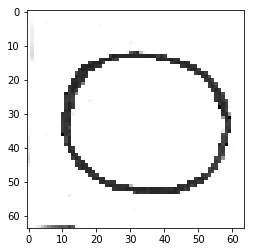

Label: [[0. 1. 0.]
 [0. 1. 0.]] S2_Rund | Vorhersage: [0.00 0.00 1.00] S2_Tropfen


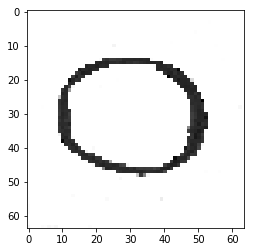

Label: [[0. 1. 0.]
 [0. 1. 0.]] S2_Rund | Vorhersage: [0.00 0.00 1.00] S2_Tropfen


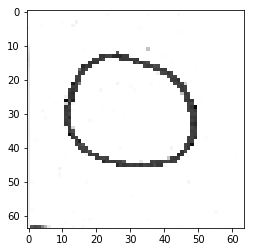

Label: [[0. 1. 0.]
 [0. 1. 0.]] S2_Rund | Vorhersage: [0.01 0.70 0.29] S2_Rund


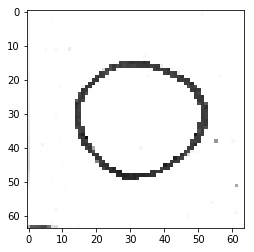

Label: [[0. 1. 0.]
 [0. 1. 0.]] S2_Rund | Vorhersage: [0.00 0.00 1.00] S2_Tropfen


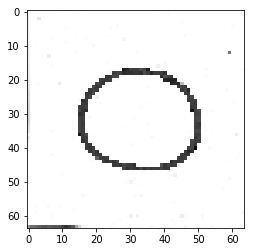

Label: [[0. 1. 0.]
 [0. 1. 0.]] S2_Rund | Vorhersage: [0.38 0.00 0.62] S2_Tropfen


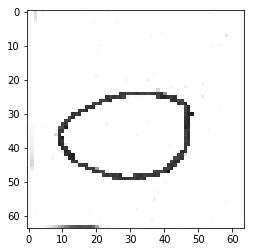

Label: [[0. 1. 0.]
 [0. 1. 0.]] S2_Rund | Vorhersage: [0.40 0.00 0.60] S2_Tropfen


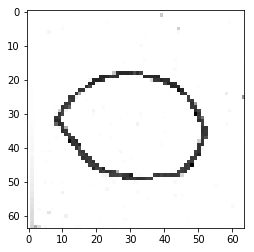

Label: [[0. 0. 1.]
 [0. 0. 1.]] S2_Tropfen | Vorhersage: [0.00 0.00 1.00] S2_Tropfen


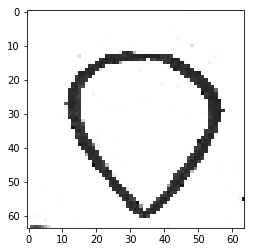

Label: [[0. 0. 1.]
 [0. 0. 1.]] S2_Tropfen | Vorhersage: [0.11 0.00 0.89] S2_Tropfen


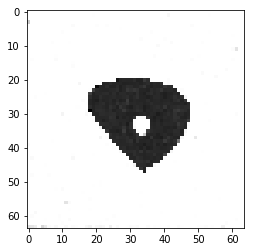

Label: [[0. 0. 1.]
 [0. 0. 1.]] S2_Tropfen | Vorhersage: [0.00 0.00 1.00] S2_Tropfen


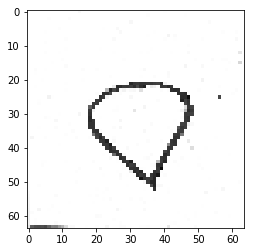

Label: [[0. 0. 1.]
 [0. 0. 1.]] S2_Tropfen | Vorhersage: [0.01 0.01 0.97] S2_Tropfen


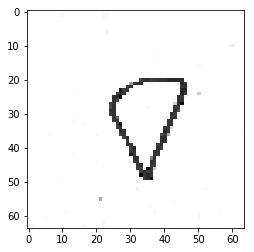

Label: [[0. 0. 1.]
 [0. 0. 1.]] S2_Tropfen | Vorhersage: [0.00 0.00 1.00] S2_Tropfen


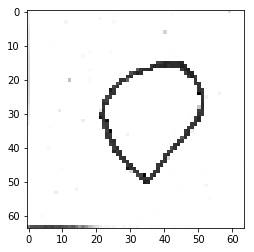

Label: [[0. 0. 1.]
 [0. 0. 1.]] S2_Tropfen | Vorhersage: [0.00 0.00 1.00] S2_Tropfen


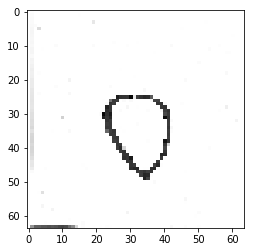

Label: [[0. 0. 1.]
 [0. 0. 1.]] S2_Tropfen | Vorhersage: [0.01 0.00 0.99] S2_Tropfen


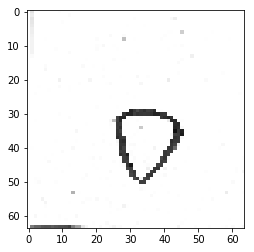

Label: [[0. 0. 1.]
 [0. 0. 1.]] S2_Tropfen | Vorhersage: [0.00 0.00 1.00] S2_Tropfen


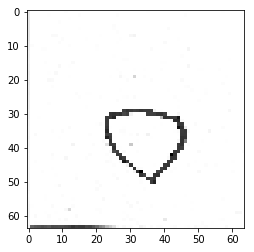

Label: [[0. 0. 1.]
 [0. 0. 1.]] S2_Tropfen | Vorhersage: [0.00 0.00 1.00] S2_Tropfen


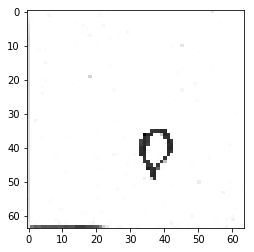

Label: [[0. 0. 1.]
 [0. 0. 1.]] S2_Tropfen | Vorhersage: [1.00 0.00 0.00] S2_Ellipse


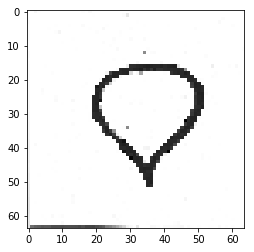

Label: [[1. 0. 0.]
 [1. 0. 0.]] S2_Ellipse | Vorhersage: [0.52 0.00 0.48] S2_Ellipse


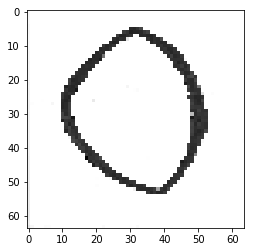

Label: [[1. 0. 0.]
 [1. 0. 0.]] S2_Ellipse | Vorhersage: [0.15 0.16 0.70] S2_Tropfen


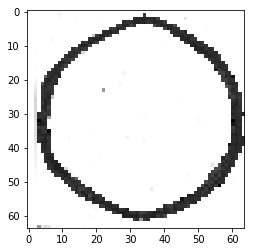

Label: [[1. 0. 0.]
 [1. 0. 0.]] S2_Ellipse | Vorhersage: [1.00 0.00 0.00] S2_Ellipse


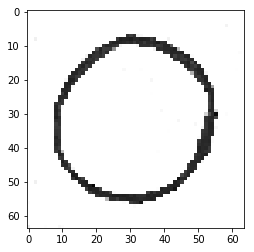

In [63]:
for i in range (0,60):
    test_batch_x, batch_y = test_set.next()
    image = test_batch_x[0]
    print("Label:", batch_y, labels[np.argmax(batch_y,axis=1)[0]], "|", "Vorhersage:", "[" + "%.2f" % pred[i][0] + " " + "%.2f" % pred[i][1] + " " + "%.2f" % pred[i][2] + "]"  , predictions[i])
    plt.imshow(image)
    plt.show()

In [12]:
model = keras.Sequential(
    [
        layers.Dense(2, activation="relu", name="layer1"),
        layers.Dense(3, activation="relu", name="layer2"),
        layers.Dense(4, name="layer3"),
    ]
)
# Call model on a test input
x = tf.ones((3, 3))
y = model(x)

TypeError: Parameter to MergeFrom() must be instance of same class: expected tensorflow.TensorShapeProto got tensorflow.TensorShapeProto.

In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
